In [72]:
import os
import numpy as np
import numpy.random as rd
import pandas as pd
from scipy import stats as st
from collections import Counter

import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]
%matplotlib inline
%config InlineBackend.figure_format='retina'

# OS判別 ======================
flag_win32 = False
try:
    os.uname()
except AttributeError:
    flag_win32 = True

# Mac用フォント設定
if not flag_win32:
    font_path = '/Library/Fonts/Osaka.ttf'
    font_prop = font_manager.FontProperties(fname=font_path)
    matplotlib.rcParams['font.family'] = font_prop.get_name()
    plt.rcParams['font.family'] = 'Osaka'


plt.rcParams["patch.force_edgecolor"] = True

def current_time():
    return dt.strftime(dt.now(),'%Y-%m-%d %H:%M:%S')

# 1. ベルヌーイ分布

In [2]:
# ベルヌーイ分布からのサンプリングを実行
# パラメーター
p = 0.7
trial_size = 10000
rd.seed(71)

# ベルヌーイ分布に従う乱数生成
data = st.bernoulli.rvs(p, size=trial_size)



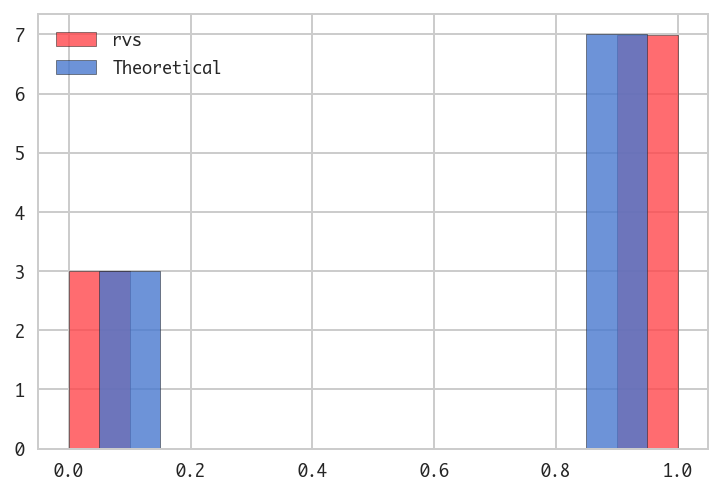

In [64]:
h = plt.hist(data, normed=True, color=red, label="rvs", alpha=0.8)
width = np.diff(h[1]).mean() # ヒストグラムの幅を算出
plt.bar([0.1, 0.9], [(1-p)/width, p/width], width=width, color="b", label="Theoretical", alpha=0.8)
plt.legend(loc="best")
plt.show()

# 2.二項分布

In [40]:
# ベルヌーイ分布を繰り返して足しわせ
def gen_bern_var(n, p):
    return(np.sum(st.bernoulli.rvs(p, size=n)))


In [35]:
# パラメーター
p = 0.7
trial_size = 100000
set_size = 30
rd.seed(71)

result = [gen_bern_var(p, set_size) for _ in range(trial_size)]

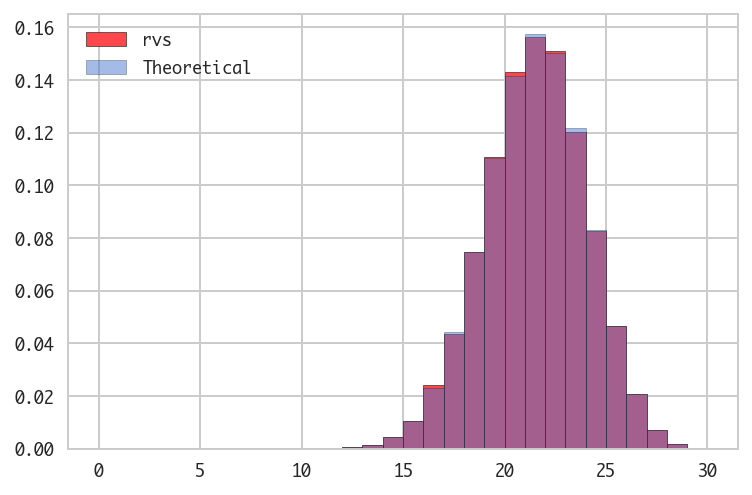

In [36]:
hist_range = np.arange(np.min(result), np.max(result)+1)
h = plt.hist(result, normed=True, bins=hist_range, color=red, label="rvs")
xx = np.arange(0, set_size)
plt.bar(xx+0.5, st.binom.pmf(xx, n=set_size, p=p), width=1, alpha=0.5, label="Theoretical")

plt.legend(loc="best")
plt.show()

# 3. ポワソン分布

In [37]:
trial_size = 5000

# もともとの問題設定
p = 0.7
n = 10
_np = p*n

# n→∞、p→0、np=一定 
n = 100000
p = _np/n

result = [gen_bern_var(n, p) for _ in range(trial_size)]

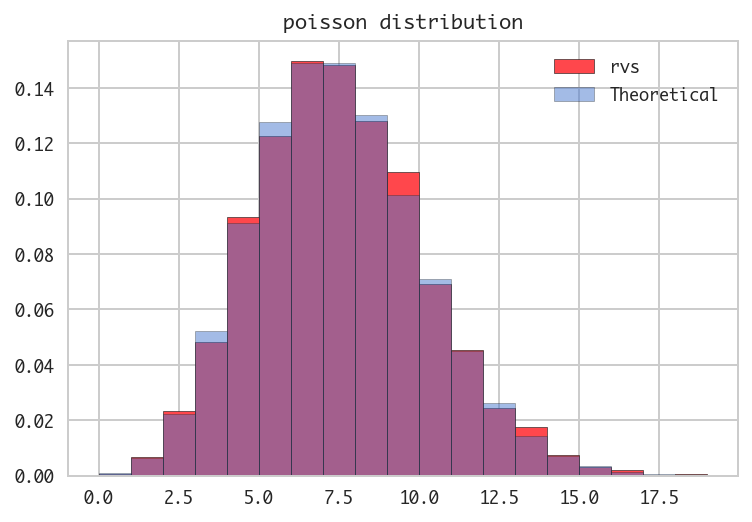

In [38]:
hist_range = np.arange(np.min(result), np.max(result)+1)
h = plt.hist(result, normed=True, bins=hist_range, color=red, label="rvs")
xx = np.arange(0, np.max(result))
plt.bar(xx+0.5, st.poisson.pmf(xx, _np), width=1, alpha=0.5, label="Theoretical")
plt.title("poisson distribution")
plt.legend(loc="best")
plt.show()

# 4. 正規分布

In [48]:
# パラメーター
n = 10000
p = 0.7;
trial_size = 50000
width=10

result = [gen_bern_var(n, p) for _ in range(trial_size)]

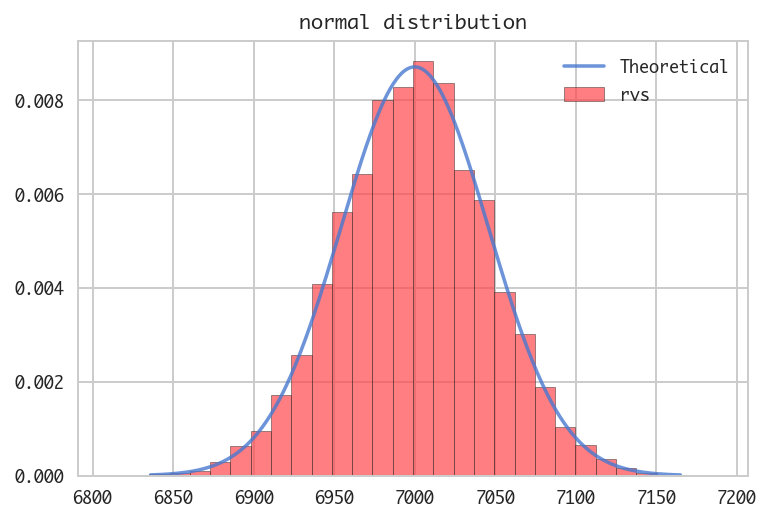

In [62]:

xx = np.arange(np.percentile(result, 0.01), np.percentile(result, 99.99))
plt.plot(xx, st.norm.pdf(xx, n*p, np.sqrt(n*p*(1-p))), alpha=0.8, label="Theoretical")

plt.hist(result, normed=True, bins=30, color=red, label="rvs", alpha=0.7)

plt.title("normal distribution")
plt.legend(loc="best")
plt.show()

# 5. 標準正規分布

In [74]:
def normalize(x):
    x = np.asanyarray(x)
    m = np.mean(x)
    sd = np.std(x)
    return (x-m)/sd

In [75]:
# パラメーター
n = 10000
p = 0.7;
trial_size = 50000
width=10

result = [gen_bern_var(n, p) for _ in range(trial_size)]
result = normalize(result)

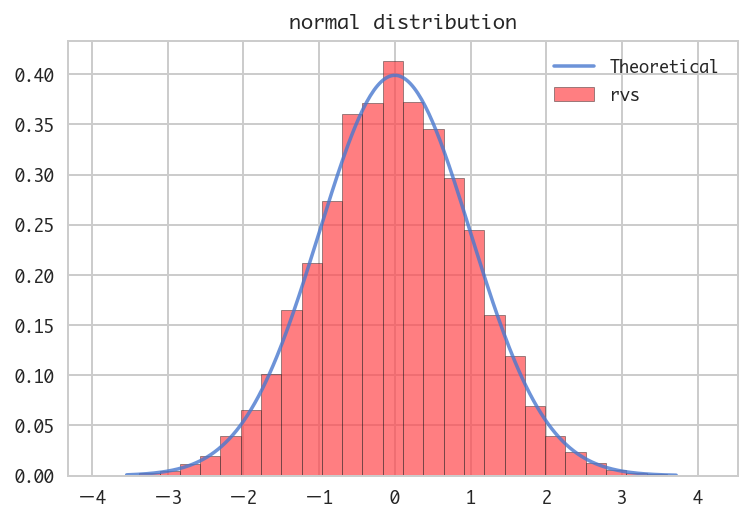

In [76]:

xx = np.linspace(np.percentile(result, 0.01), np.percentile(result, 99.99), 301)
plt.plot(xx, st.norm.pdf(xx, 0, 1), alpha=0.8, label="Theoretical")

plt.hist(result, normed=True, bins=30, color=red, label="rvs", alpha=0.7)

plt.title("normal distribution")
plt.legend(loc="best")
plt.show()

# 6. カイ二乗分布

In [80]:
# パラメーター
p = 0.7
n = 1000
trial_size = 100000
df = 3 # 自由度

def gen_chisq_rvs(n, p, size):
    result = [gen_bern_var(n, p) for _ in range(size)]
    return normalize(result)**2

result = np.sum([gen_chisq_rvs(n, p, trial_size) for _ in range(df)], axis=0)

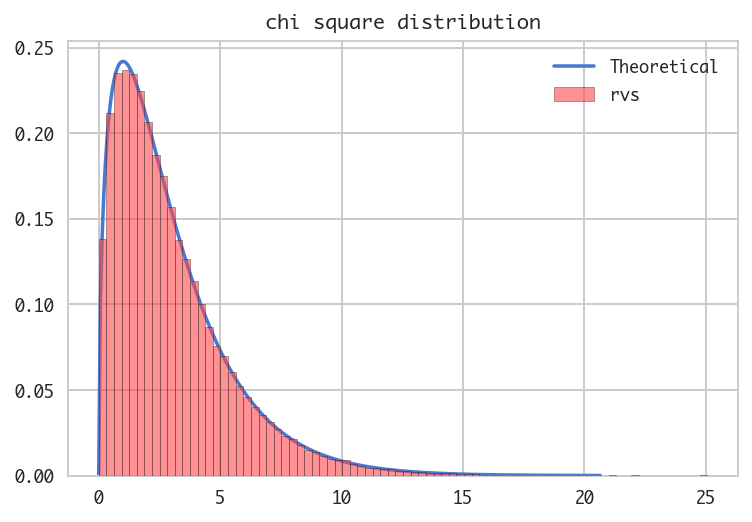

In [99]:

xx = np.linspace(0, np.percentile(result, 99.99), 301)
plt.plot(xx, st.chi2.pdf(xx, df), alpha=1, label="Theoretical")

plt.hist(result, normed=True, bins=80, color=red, label="rvs", alpha=0.6, zorder=100)

plt.title("chi square distribution")
plt.legend(loc="best")
plt.show()

# 7. 指数分布

In [111]:
trial_size = 7000

# もともとの問題設定
p = 0.7
n = 10
lamb = p*n

# n→∞、p→0、np=一定 
n = 10000
_p = lamb/n

# 指数分布に従う乱数生成
def gen_exp_rvs(p):
    cnt = 0
    while (True):
        cnt += 1
        if (st.bernoulli.rvs(p)==1):
            return cnt  # 1が出たらそれが何回目かを返す

result = np.array([gen_exp_rvs(_p) for _ in range(trial_size)])

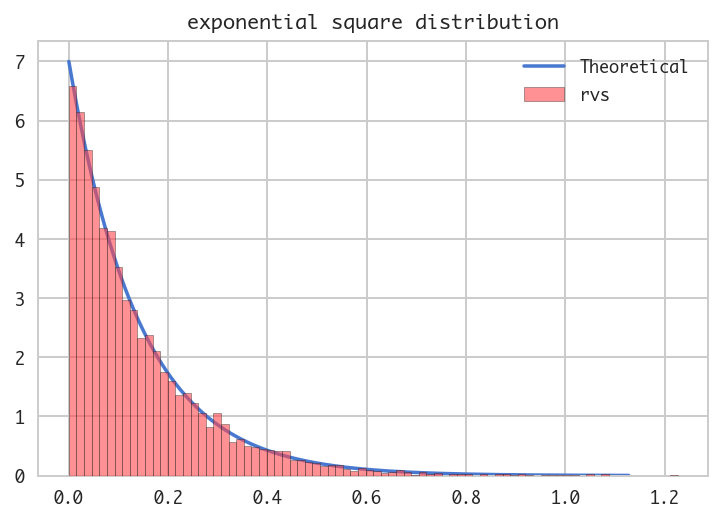

In [171]:

xx = np.linspace(0, np.percentile(result/n, 99.99), 301)
plt.plot(xx, st.expon.pdf(xx, 0, 1/lamb), alpha=1, label="Theoretical")

h =plt.hist(result/n, normed=True, bins=80, color=red, label="rvs", alpha=0.6, zorder=100)
plt.title("exponential square distribution")
plt.legend(loc="best")
plt.show()

# 8. ガンマ分布

In [205]:
trial_size = 1000
k = 3 # 指数分布に従う乱数が５回発生するまで

# もともとの問題設定
p = 0.7
n = 10
lamb = p*n

# n→∞、p→0、np=一定 
n = 10000
_p = lamb/n

In [206]:
# 指数分布に従う乱数生成
i = 0
def gen_exp_rvs(p):
    global i
    print("\r i={}".format(i), end=""); i += 1
    cnt = 0
    while (True):
        cnt += 1
        if (st.bernoulli.rvs(p)==1):
            return cnt  # 1が出たらそれが何回目かを返す

result = np.array([gen_exp_rvs(_p) for _ in range(trial_size) for _ in range(k)])
result = result.reshape((trial_size, k))
result = np.sum(result, axis=1)/n

 i=2999

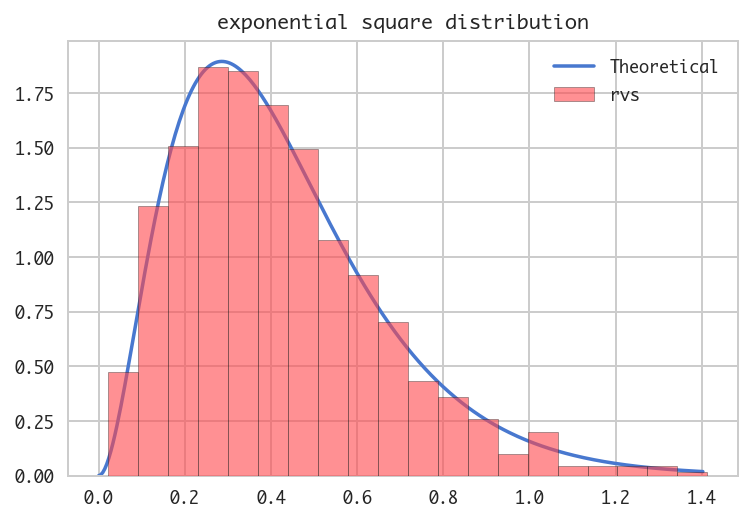

In [212]:
xx = np.linspace(0, np.percentile(result, 99.99), 301)
plt.plot(xx, st.gamma.pdf(xx, k, loc=0, scale=1/lamb), alpha=1, label="Theoretical")

h =plt.hist(result, normed=True, bins=20, color=red, label="rvs", alpha=0.6, zorder=100)
plt.title("exponential square distribution")
plt.legend(loc="best")
plt.show()

In [217]:
trial_size = 20000
k = 5 # 指数分布に従う乱数が５回発生するまで

# もともとの問題設定
p = 0.7
n = 10
lamb = p*n

# n→∞、p→0、np=一定 
n = 10000
_p = lamb/n

In [218]:
# 指数分布に従う乱数生成 高速版
def gen_exp_rvs(p):
    data = st.bernoulli.rvs(p, size=trial_size*n)
    cnt = Counter(data.cumsum())
    result = np.asarray(list(cnt.values()))[:trial_size*k]
    return np.sum(result.reshape((trial_size, k)),axis=1)/n

%time result = gen_exp_rvs(_p)

CPU times: user 35 s, sys: 2.48 s, total: 37.5 s
Wall time: 37.9 s


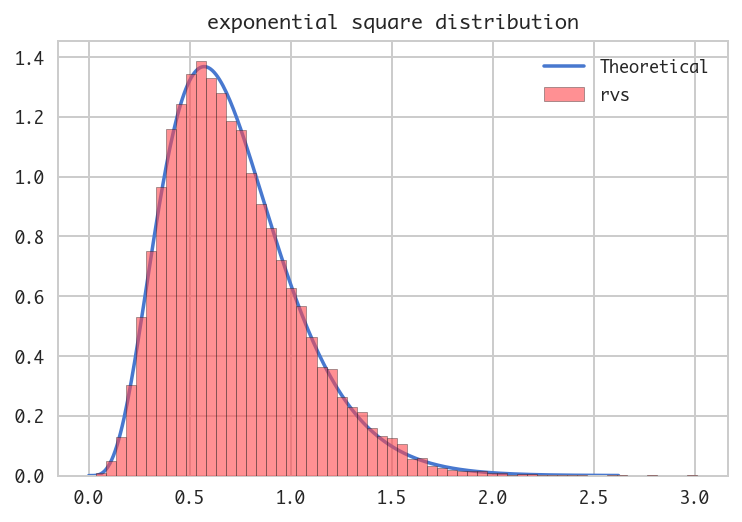

In [219]:
xx = np.linspace(0, np.percentile(result, 99.99), 301)
plt.plot(xx, st.gamma.pdf(xx, k, loc=0, scale=1/lamb), alpha=1, label="Theoretical")

h =plt.hist(result, normed=True, bins=60, color=red, label="rvs", alpha=0.6, zorder=100)
plt.title("gammna distribution")
plt.legend(loc="best")
plt.show()

# 9. 逆ガンマ分布

In [232]:
trial_size = 20000
k = 5 # 指数分布に従う乱数が５回発生するまで

# もともとの問題設定
p = 0.7
n = 10
lamb = p*n

# n→∞、p→0、np=一定 
n = 10000
_p = lamb/n

In [233]:
# ガンマ分布の生成
%time result = gen_exp_rvs(_p)
# 逆ガンマ分布化
result = result**-1

CPU times: user 35.3 s, sys: 2.66 s, total: 37.9 s
Wall time: 38.3 s


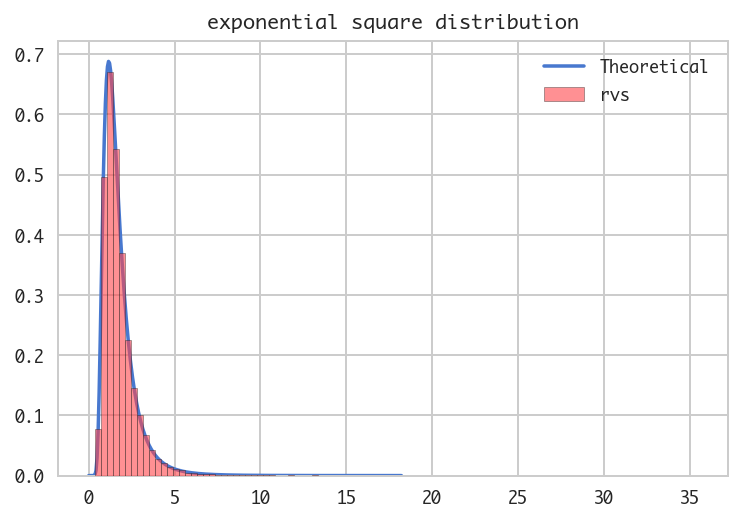

In [235]:
xx = np.linspace(0, np.percentile(result, 99.99), 301)
plt.plot(xx, st.invgamma.pdf(xx, k, loc=0, scale=lamb), alpha=1, label="Theoretical")

h =plt.hist(result, normed=True, bins=100, color=red, label="rvs", alpha=0.6, zorder=100)
plt.title("inverse gammna distribution")
plt.legend(loc="best")
plt.show()

# 10. 標準一様分布

In [236]:
p = 0.5
digits_length = 1000
trial_size = 100000

In [289]:
def gen_unif_rand(p, digits_length):
    # sample_size桁の2進少数をベルヌーイ分布に
    # 従う乱数から生成
    return np.dot(st.bernoulli.rvs(p, size=digits_length),[0.5**(i+1) for i in range(digits_length)] )

In [251]:
%time result = [gen_unif_rand(p, digits_length) for _ in range(trial_size)]

CPU times: user 24.9 s, sys: 36.6 ms, total: 25 s
Wall time: 25 s


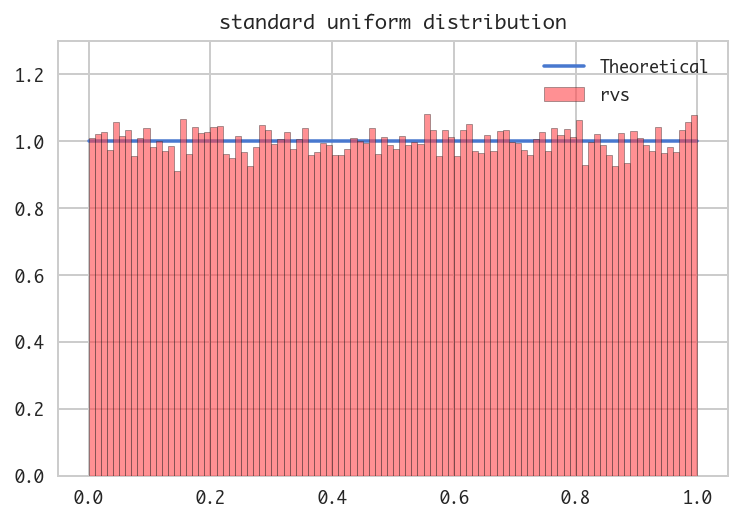

In [257]:
xx = np.linspace(0, 1, 301)
plt.plot(xx, st.uniform.pdf(xx), alpha=1, label="Theoretical")

h =plt.hist(result, normed=True, bins=100, color=red, label="rvs", alpha=0.6, zorder=100)
plt.title("standard uniform distribution")
plt.legend(loc="best")
plt.ylim(0, 1.3)
plt.show()

# 11. 一様分布

In [258]:
a = 5
b = 8
p = 0.5
digits_length = 1000
trial_size = 100000

In [276]:
%time result = [gen_unif_rand(p, digits_length) for _ in range(trial_size)]
result = np.array(result)*(b-a) + a

CPU times: user 26.8 s, sys: 196 ms, total: 27 s
Wall time: 27.4 s


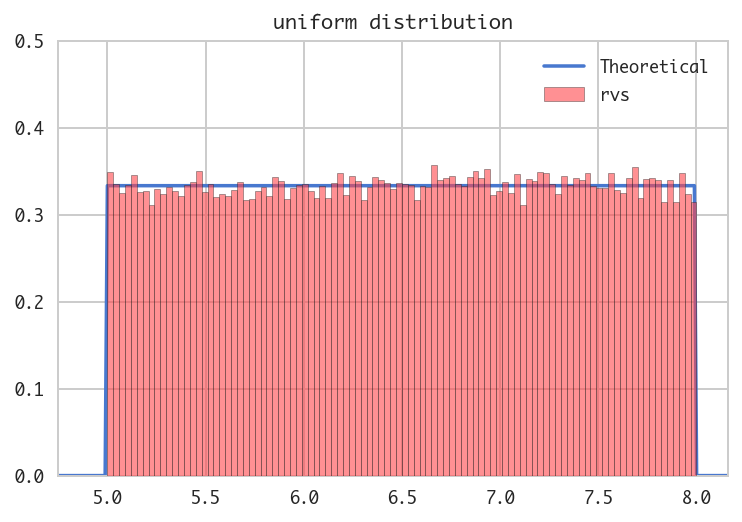

In [285]:
xx = np.linspace(np.min(result)*0.95, np.max(result)*1.02, 301)
plt.plot(xx, st.uniform.pdf(xx, a, b-a), alpha=1, label="Theoretical")

h =plt.hist(result, normed=True, bins=100, color=red, label="rvs", alpha=0.6, zorder=100)
plt.title("uniform distribution")
plt.legend(loc="best")
p
plt.ylim(0, 0.5)
plt.xlim(np.min(result)*0.95, np.max(result)*1.02)
plt.show()

# 12. ベータ分布

In [290]:
p = 0.5
digits_length = 30
set_size = 3
trial_size = 30000

In [300]:
# set_size個の標準一様分布に従う乱数をtrial_sizeセット生成する
%time result = np.array([gen_unif_rand(p, digits_length) for _ in range(trial_size*set_size)]).reshape((trial_size, set_size))

CPU times: user 5.73 s, sys: 20.3 ms, total: 5.75 s
Wall time: 5.78 s


In [309]:
# ソートして2つ目のみ残す
result.sort(axis=1)
result = result[:,1]

In [310]:
result.shape

(30000,)

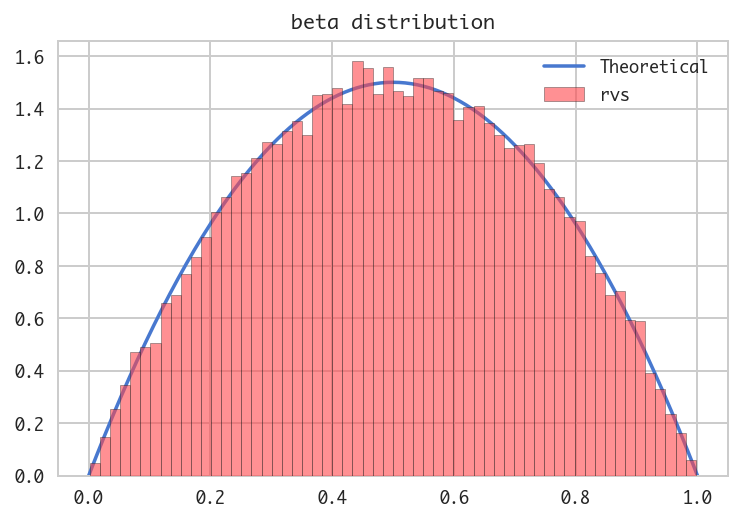

In [314]:
xx = np.linspace(0, 1, 301)
plt.plot(xx, st.beta.pdf(xx, 2, 2), alpha=1, label="Theoretical")

h =plt.hist(result, normed=True, bins=60, color=red, label="rvs", alpha=0.6, zorder=100)
plt.title("beta distribution")
plt.legend(loc="best")
plt.show()